In [1]:
import pandas as pd

# rocket motor categories 
# Total impulse of motors by category ( from wikpedia)
impulses_by_category = [
    ('Micro', 0),
    ('1/4A', 0.3126),
    ('1/2A', 0.626),
    ('A', 1.26),
    ('B', 2.51),
    ('C', 5.01),
    ('D', 10.01),
    ('E', 20.01),
    ('F', 40.01),
    ('G', 80.01),
    ('H', 160.01),
    ('I', 320.01),
    ('J', 640.01),
    ('K', 1280.01),
    ('L', 2560.01),
    ('M', 5120.01),
    ('N', 10240.01),
    ('O', 20480.01),
    ('P', 40960.01),
    ('Q', 81920.01),
    ('R', 163840.01)]


In [2]:
df = pd.read_csv('saved_data/3_cores.csv')
df = df.set_index('ts')

<AxesSubplot:xlabel='ts'>

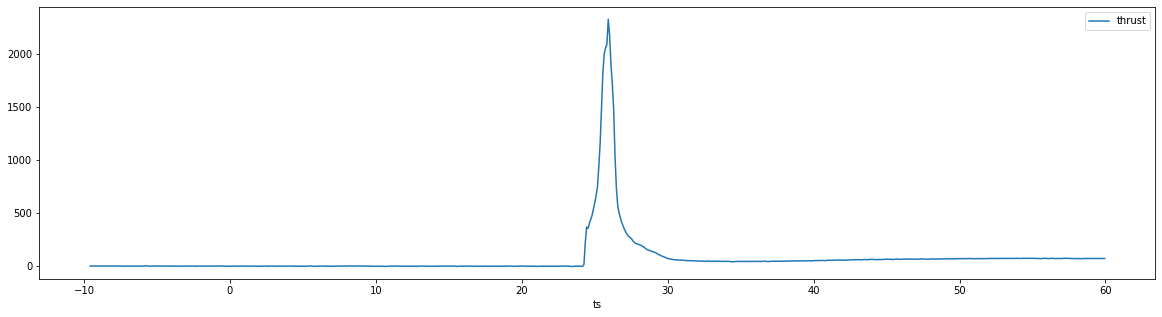

In [3]:
df['thrust_in_g'].plot(x='ts', y='thrust_in_g', label='thrust', legend=True, figsize=(20,5)) 

In [4]:
# detect first non-zero values and use that as T0
def detect_tzero(df, min_thrust_pct=5, end_thrust_pct=2):
    t0 = None
    tfinal = None
    # max value of the thrust
    max_thrust = df['thrust_in_g'].max()
    for i, row in df.iterrows():
        if row['thrust_in_g'] > max_thrust * min_thrust_pct / 100 : # 5% of thrust
            t0 = i
            break
    print("Found actual T0 at {}".format(t0))

    # detect end of thrust
    for i, row in df.iterrows():
        if i > t0 and row['thrust_in_g'] < max_thrust * end_thrust_pct / 100 : # 2% of thrust
            tfinal = i
            break 
    
    print("Found end of thrust at {}".format(tfinal))
    return t0, tfinal

def detect_motor_category(total_impulse):
    motor_category = None
    for i, (category, impulse) in enumerate(impulses_by_category):
        if total_impulse >= impulse and total_impulse < impulses_by_category[i+1][1]:
            motor_category = category
            break
    return motor_category

Found actual T0 at 24.355634212493896
Found end of thrust at 30.087310075759888


<AxesSubplot:xlabel='ts'>

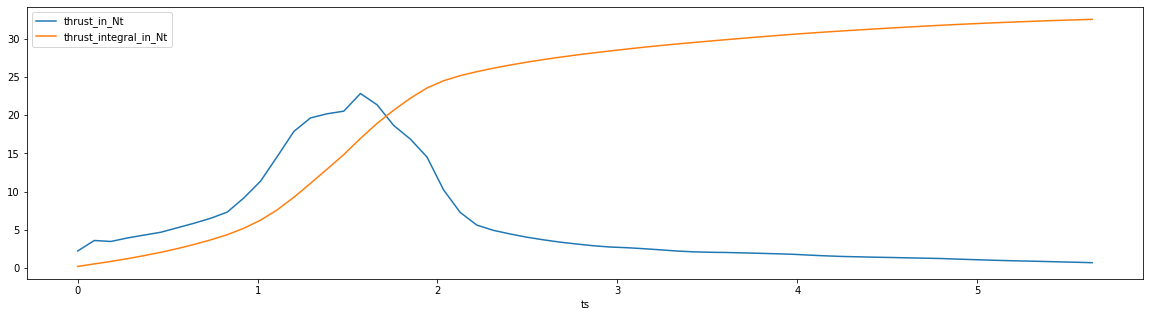

In [5]:
t0, tfinal = detect_tzero(df, min_thrust_pct=2, end_thrust_pct=3)
# only keep data from dataframe with index between t0 and before tfinal
cleaned_df = df[(df.index >= t0) & (df.index < tfinal)].copy()
cleaned_df.index -= t0
cleaned_df['thrust_integral'] = cleaned_df.thrust_in_g.rolling(window=len(cleaned_df), min_periods=1).sum() * (tfinal - t0) / len(cleaned_df)

# in Newtons
cleaned_df['thrust_in_Nt'] = cleaned_df['thrust_in_g'] * 9.81 / 1000
cleaned_df['thrust_integral_in_Nt'] = cleaned_df['thrust_integral'] * 9.81 / 1000

cleaned_df[['thrust_in_Nt', 'thrust_integral_in_Nt']].plot(figsize=(20,5)) 


In [6]:
max_thrust = cleaned_df['thrust_in_g'].max()
print("Maximum thrust is {} kg".format(max_thrust/1000))

total_impulse = cleaned_df['thrust_integral_in_Nt'].max()
print("Total impulse is {} Ns".format(total_impulse))

motor_catory = detect_motor_category(total_impulse)
print("Motor category is {}".format(motor_catory))




Maximum thrust is 2.326 kg
Total impulse is 32.51777182708925 Ns
Motor category is E
